In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
sns.set_theme(style="ticks")

In [138]:
plt.rcParams["figure.figsize"] = (20,15)

In [146]:
carteira_demanda = pd.read_csv('/content/drive/MyDrive/1-desafio gerdau/carteira_demanda_final.csv')
carteira_demanda.head(3)

,abc_curve,client_id,client_name,confirmed_date,demand_type,document_id,document_item,due_month,fevor,make_to,...,plant_id,postponed_date,predicted,product_type,promised_date,quantity_old,quantity,sales_organization,material_aggregation,component_material_type
0,NaN,4416,4416,3/24/2021,Comercial Gerdau,4513942120,10,M0,251,MTS,...,1407,NaN,False,ACABADO,5/28/2021,1232000,1232.0,BRTR,RETO_10MM_INTERNAL_LCT_160,TARUGO_LCT_160
1,NaN,4416,4416,3/24/2021,Comercial Gerdau,4514028107,10,M0,251,MTS,...,1407,NaN,False,ACABADO,6/26/2021,524000,524.0,BRTR,"RETO_6,3MM_INTERNAL_LCT_160",TARUGO_LCT_160
2,NaN,4416,4416,3/23/2021,Comercial Gerdau,4514085943,10,M0,251,MTS,...,1407,NaN,False,ACABADO,4/2/2021,300000,300.0,BRTR,"RETO_12,5MM_INTERNAL_LCT_160",TARUGO_LCT_160


In [147]:
carteira_demanda.columns

Index(['abc_curve', 'client_id', 'client_name', 'confirmed_date',
       'demand_type', 'document_id', 'document_item', 'due_month', 'fevor',
       'make_to', 'material_category', 'material_desc', 'material_id',
       'material_type', 'opportunity_date', 'origem_date', 'otif_date',
       'plant_id', 'postponed_date', 'predicted', 'product_type',
       'promised_date', 'quantity_old', 'quantity', 'sales_organization',
       'material_aggregation', 'component_material_type'],
      dtype='object')

In [149]:
grouped_carteira = carteira_demanda.groupby(['demand_type', 'due_month', 'predicted'])['quantity'].sum().reset_index(name='Volume_total')
grouped_carteira

,demand_type,due_month,predicted,Volume_total
0,Comercial Gerdau,M0,False,7200.091000
1,Comercial Gerdau,M1,False,1207.819000
2,Comercial Gerdau,M1,True,376.484326
3,Comercial Gerdau,M2,False,972.996000
4,Comercial Gerdau,M2,True,442.114310
5,Comercial Gerdau,M3,True,552.429777
6,Comercial Gerdau,M4,False,6.000000
7,Comercial Gerdau,M4,True,498.592531
8,Comercial Gerdau,M5,True,509.874086
9,Corte e Dobra,M0,False,10153.431000


In [150]:
grouped_carteira['due_month'].unique()

array(['M0', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'],
      dtype=object)

In [151]:
grouped_carteira.sort_values(by='due_month', inplace=True)

In [152]:
grouped_carteira.columns

Index(['demand_type', 'due_month', 'predicted', 'Volume_total'], dtype='object')

In [153]:
filtered_grouped_carteira = grouped_carteira[(grouped_carteira['due_month'] != 'M6') & (grouped_carteira['due_month'] != 'M7') & (grouped_carteira['due_month'] != 'M8') & (grouped_carteira['due_month'] != 'M9')]
filtered_grouped_carteira

,demand_type,due_month,predicted,Volume_total
0,Comercial Gerdau,M0,False,7200.091000
16,Mercado Interno,M0,False,51133.133690
30,Planta,M0,False,120.455000
14,Mercado Externo,M0,False,1333.928700
9,Corte e Dobra,M0,False,10153.431000
17,Mercado Interno,M1,False,19338.555000
13,Estoque,M1,True,5748.151114
10,Corte e Dobra,M1,False,8940.197000
15,Mercado Externo,M1,False,399.936000
31,Planta,M1,False,300.000000


In [154]:
filtered_grouped_carteira[filtered_grouped_carteira['due_month'] == 'M5']

,demand_type,due_month,predicted,Volume_total
8,Comercial Gerdau,M5,True,509.874086
24,Mercado Interno,M5,False,310.667000
25,Mercado Interno,M5,True,11039.026232


In [167]:
def catplot(df, x, y, hue, col, x_lab, y_lab, title):
  g = sns.catplot(x=x, y=y,
                  hue=hue, col=col, 
                  data=df, kind="bar",
                  height=5, order = ['Comercial Gerdau', 'Corte e Dobra', 'Estoque', 'Mercado Externo', 'Mercado Interno', 'Planta'], aspect=.6, dodge=False)
  
  g.fig.subplots_adjust(top=0.8) # adjust the Figure in rp
  g.fig.suptitle(title, fontsize=20, fontweight='bold', horizontalalignment='center')
  g.set_xticklabels(rotation=90)
  g.set_titles(template='{col_name}', horizontalalignment='center')
  g.set_xlabels(x_lab, fontweight='bold')
  g.set_ylabels(y_lab, fontweight='bold')
  sns.move_legend(g, "upper right", frameon=False)
  plt.subplots_adjust(bottom=0.1, hspace=0.2)
  plt.yticks([0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000])
  plt.show();

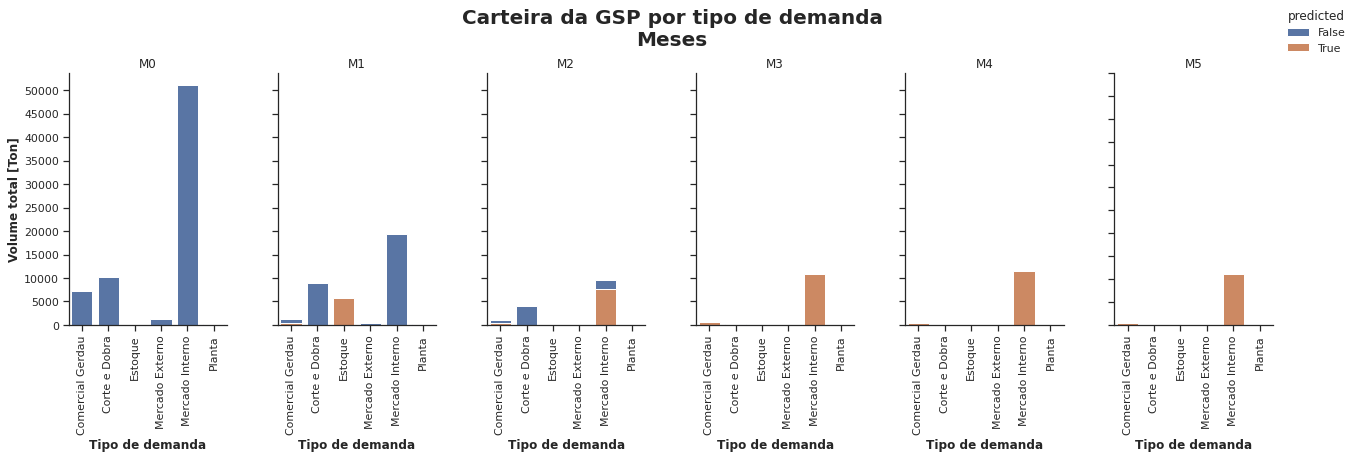

In [168]:
catplot(filtered_grouped_carteira, 'demand_type', 'Volume_total', 'predicted', 'due_month', 'Tipo de demanda', 'Volume total [Ton]', 'Carteira da GSP por tipo de demanda\nMeses')

In [169]:
filtered_grouped_carteira.columns

Index(['demand_type', 'due_month', 'predicted', 'Volume_total'], dtype='object')

In [170]:
filtered_grouped_carteira.rename(columns = {'demand_type': 'Tipo de demanda', 'due_month': 'Meses', 'predicted': 'Previsões', 'Volume_total': 'Volume total [Ton]'}, inplace = True)
filtered_grouped_carteira

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Tipo de demanda,Meses,Previsões,Volume total [Ton]
0,Comercial Gerdau,M0,False,7200.091000
16,Mercado Interno,M0,False,51133.133690
30,Planta,M0,False,120.455000
14,Mercado Externo,M0,False,1333.928700
9,Corte e Dobra,M0,False,10153.431000
17,Mercado Interno,M1,False,19338.555000
13,Estoque,M1,True,5748.151114
10,Corte e Dobra,M1,False,8940.197000
15,Mercado Externo,M1,False,399.936000
31,Planta,M1,False,300.000000


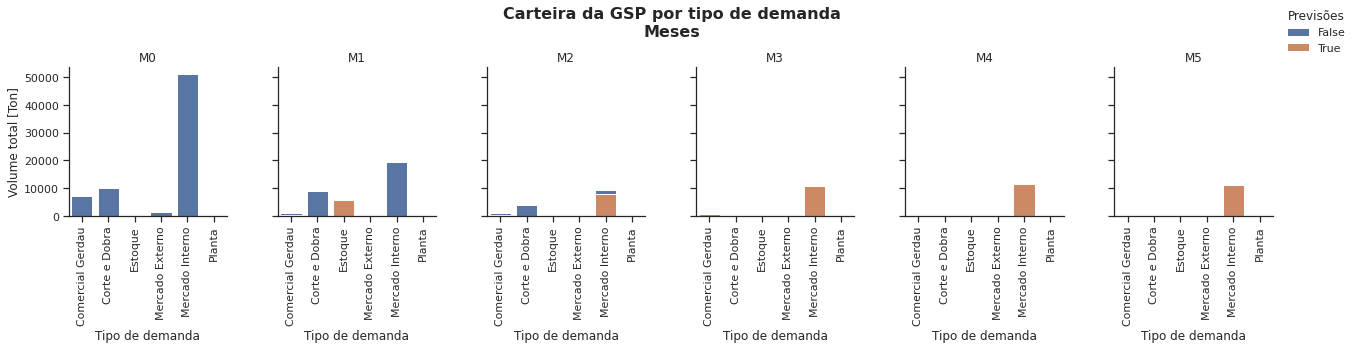

<Figure size 1080x720 with 0 Axes>

In [171]:
g = sns.FacetGrid(filtered_grouped_carteira, col = 'Meses',  hue = 'Previsões')
g = (g.map(sns.barplot, 'Tipo de demanda', 'Volume total [Ton]',  order = ['Comercial Gerdau', 'Corte e Dobra', 'Estoque', 'Mercado Externo', 'Mercado Interno', 'Planta'],ci = None).add_legend())

# g.fig.subplots_adjust(top=0) # adjust the Figure in rp
g.fig.suptitle('Carteira da GSP por tipo de demanda\nMeses', fontsize=16, fontweight='bold', horizontalalignment='center')
g.set_titles(template='{col_name}')
g.set_xticklabels(rotation=90)
sns.move_legend(g, "upper right", frameon=False)
plt.subplots_adjust(bottom=0.01, hspace=5, top=0.7)
plt.figure(figsize=(15, 10)) 
plt.show();

In [172]:
filtered_grouped_carteira['Tipo de demanda'].unique()

array(['Comercial Gerdau', 'Mercado Interno', 'Planta', 'Mercado Externo',
       'Corte e Dobra', 'Estoque'], dtype=object)

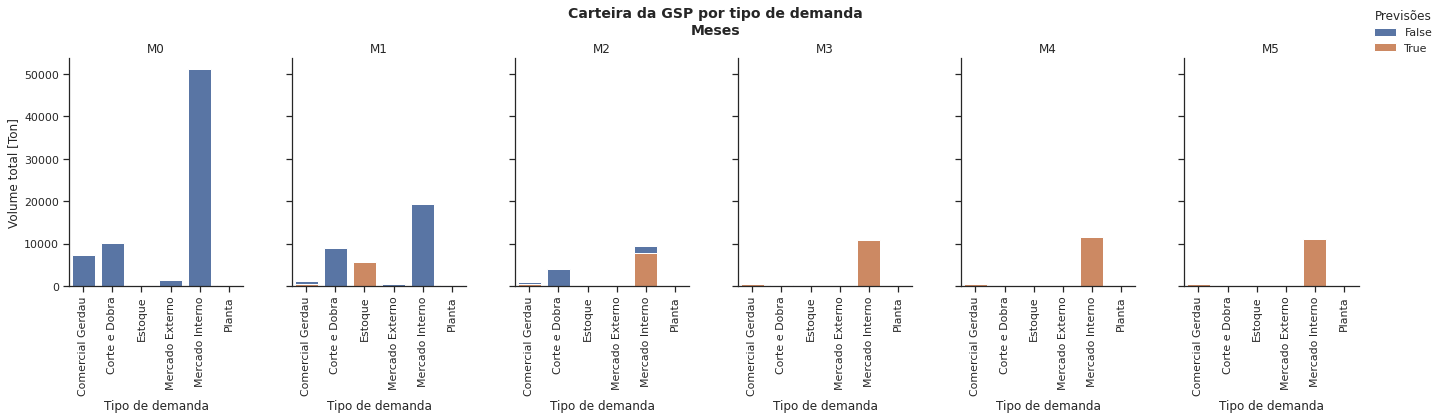

<Figure size 1080x1080 with 0 Axes>

In [173]:
g = sns.FacetGrid(filtered_grouped_carteira, col = 'Meses',  hue = 'Previsões', height=4, aspect=.8)
g = (g.map(sns.barplot, 'Tipo de demanda', 'Volume total [Ton]', order = ['Comercial Gerdau', 'Corte e Dobra', 'Estoque', 'Mercado Externo', 'Mercado Interno', 'Planta']).add_legend())
g.fig.suptitle('Carteira da GSP por tipo de demanda\nMeses', fontsize=14, fontweight='bold', horizontalalignment='center')

g.set_titles(template='{col_name}')
g.set_xticklabels(rotation=90)

sns.move_legend(g, "upper right", frameon=False)
plt.subplots_adjust(bottom=0.01, hspace=5, top=.8)
plt.figure(figsize=(15, 15)) 
plt.show();